## Feature Extraction Techniques

Most classic machine learning and deep learning algorithms can't take in raw text. Instead, we need to perform feature extraction from the raw text in order to pass numerical features to machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 200

corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


You can see that we have taken a few sample text documents belonging to different categories for our toy corpus. Before we talk about feature engineering, as always, we need to do some data pre-processing or wrangling to remove unnecessary characters, symbols and tokens.

In [3]:
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

## Bag of Words Model - TF

This is perhaps the most simple vector space representational model for unstructured text. A vector space model is simply a mathematical model to represent unstructured text (or any other data) as numeric vectors, such that each dimension of the vector is a specific feature\attribute. The bag of words model represents each text document as a numeric vector where each dimension is a specific word from the corpus and the value could be its frequency in the document, occurrence (denoted by 1 or 0) or even weighted values. The model’s name is such because each document is represented literally as a ‘bag’ of its own words, disregarding word orders, sequences and grammar.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus).toarray()
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## Bag of N-Grams Model

A word is just a single token, often known as a unigram or 1-gram. We already know that the Bag of Words model doesn’t consider order of words. But what if we also wanted to take into account phrases or collection of words which occur in a sequence? N-grams help us achieve that. An N-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on. The Bag of N-Grams model is hence just an extension of the Bag of Words model so we can also leverage N-gram based features. The following example depicts bi-gram based features in each document feature vector.

In [5]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF
The TF-IDF model tries to combat this issue by using a scaling or normalizing factor in its computation. TF-IDF stands for Term Frequency-Inverse Document Frequency, which uses a combination of two metrics in its computation, namely: term frequency (tf) and inverse document frequency (idf).

Mathematically, we can define TF-IDF as ___tfidf = tf x idf___, which can be expanded further to be represented as follows.

Here, ___tfidf(w, D)___ is the TF-IDF score for word __w__ in document __D__. 
- The term ___tf(w, D)___ represents the term frequency of the word __w__ in document __D__, which can be obtained from the Bag of Words model. 
- The term ___idf(w, D)___ is the inverse document frequency for the term __w__, which can be computed as the log transform of the total number of documents in the corpus __C__ divided by the document frequency of the word __w__, which is basically the frequency of documents in the corpus where the word __w__ occurs. 

There are multiple variants of this model but they all end up giving quite similar results. Let’s apply this on our corpus now!

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


The TF-IDF based feature vectors for each of our text documents show scaled and normalized values as compared to the raw Bag of Words model values. 

* Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the most important words and the less important ones as well.

* Bag of Words vectors is easy to interpret. However, TF-IDF usually performs better in machine learning models.

* While both Bag-of-Words and TF-IDF have been popular in their own regard, there still remained a void where understanding the context of words was concerned. Detecting the similarity between the words 'spooky' and 'scary', or translating our given documents into another language, requires a lot more information on the documents.

* This is where Word Embedding techniques such as Word2Vec, Continuous Bag of Words (CBOW), Skipgram, etc. come in.

# The Word2Vec Model

This model was created by Google in 2013 and is a predictive deep learning based model to compute and generate high quality, distributed and continuous dense vector representations of words, which capture contextual and semantic similarity. Essentially these are unsupervised models which can take in massive textual corpora, create a vocabulary of possible words and generate dense word embeddings for each word in the vector space representing that vocabulary. 

Usually you can specify the size of the word embedding vectors and the total number of vectors are essentially the size of the vocabulary. This makes the dimensionality of this dense vector space much lower than the high-dimensional sparse vector space built using traditional Bag of Words models.

There are two different model architectures which can be leveraged by Word2Vec to create these word embedding representations. These include,

- The Continuous Bag of Words (CBOW) Model
- The Skip-gram Model

## The Continuous Bag of Words (CBOW) Model

The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words). 

Considering a simple sentence, ___“the quick brown fox jumps over the lazy dog”___, this can be pairs of __(context_window, target_word)__ where if we consider a context window of size 2, we have examples like __([quick, fox], brown)__, __([the, brown], quick)__, __([the, dog], lazy)__ and so on. 

Thus the model tries to predict the __`target_word`__ based on the __`context_window`__ words.


## The Skip-gram Model

The Skip-gram model architecture usually tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word). 

Considering our simple sentence from earlier, ___“the quick brown fox jumps over the lazy dog”___. If we used the CBOW model, we get pairs of __(context_window, target_word)__ where if we consider a context window of size 2, we have examples like __([quick, fox], brown)__, __([the, brown], quick)__, __([the, dog], lazy)__ and so on. 

Now considering that the skip-gram model’s aim is to predict the context from the target word, the model typically inverts the contexts and targets, and tries to predict each context word from its target word. Hence the task becomes to predict the context __[quick, fox]__ given target word __‘brown’__ or __[the, brown]__ given target word __‘quick’__ and so on. 

Thus the model tries to predict the context_window words based on the target_word.


In [16]:
import nltk
from gensim.models import word2vec

tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample)
w2v_model

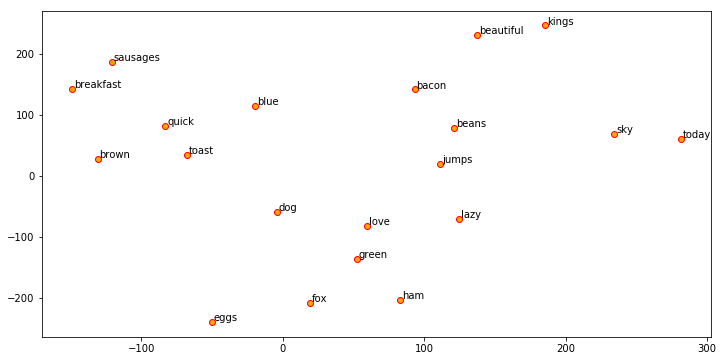

In [22]:
import matplotlib.pyplot as plt


# visualize embeddings
from sklearn.manifold import TSNE

words = w2v_model.wv.index_to_key
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0.4, 0.4), textcoords='offset points')

In [24]:
vec_df = pd.DataFrame(wvs, index=words)
vec_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
sky,-0.003540,0.001560,0.034037,0.060077,-0.062006,-0.047405,0.043101,0.059854,-0.033459,-0.025060,0.049163,-0.010242,-0.030268,0.043670,-0.032380
blue,-0.012143,0.019178,0.006643,-0.055239,-0.063004,0.048719,0.033818,0.045115,0.005055,0.042300,-0.022684,-0.006316,0.038458,-0.050172,-0.026223
lazy,-0.050090,-0.006227,0.063564,-0.048837,-0.015604,-0.012856,0.053868,-0.039481,0.000323,-0.031702,-0.064002,0.033445,-0.058397,-0.029338,-0.000201
beautiful,-0.001990,-0.051052,0.064096,0.033195,0.061518,-0.054377,0.029957,-0.027585,0.005513,0.056660,-0.029712,0.030127,-0.045224,-0.023657,0.062639
quick,-0.010492,0.002113,-0.027592,-0.051179,-0.010060,0.016469,-0.005886,0.036926,-0.018303,0.015078,0.036367,0.055643,-0.009723,-0.061388,0.029149
brown,0.003800,0.049603,-0.005416,-0.017596,-0.058370,-0.005716,0.018846,0.036011,0.047032,-0.038015,0.012399,0.040614,-0.031983,-0.020725,0.045322
fox,0.010859,0.001269,0.023165,0.001427,0.064131,0.033751,-0.059435,-0.046923,0.006002,0.042589,-0.057488,0.024438,0.034591,0.038257,0.049794
dog,-0.041152,0.007391,0.040372,-0.018934,-0.041178,-0.002781,-0.055791,-0.037374,0.047373,0.022340,0.048164,0.045348,0.050175,-0.025250,-0.003770
sausages,0.015656,-0.030127,0.055925,-0.065721,0.045098,0.019429,-0.032886,0.029321,-0.011597,0.044743,0.066432,-0.029083,-0.003996,-0.037971,0.025672
ham,0.018559,0.045938,0.040702,0.063572,0.061795,0.052665,-0.046561,-0.060992,-0.002381,-0.020669,0.052627,0.039602,-0.010317,0.010032,0.011956


## Cosine Similarity
Cosine Similarity is used to measure how similar word vectors are each other. Cosine similarity is essentially checking the distance between the two vectors.

* We can also perform vector arithmetic with the word vectors.
  `new_vector = king - man+woman`
* This creates a new vector that we can then attempt to find most similar vectors too.
  `new vector closest to vector for queen`
  
  Cosine similarity is the cos of the angle between the two vectors. Cosine distance can be found by 1- Cosine Similarity. Higher the angle between two vectors lower the cosine similarity which gives high cosine distance value, whereas lower the angle between two vectors higher the cosine similarity which gives low cosine distance value.

In [25]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
similarity_df

,sky,blue,lazy,beautiful,quick,brown,fox,dog,sausages,ham,bacon,eggs,love,breakfast,kings,green,jumps,toast,beans,today
sky,1.000000,-0.092274,-0.052460,-0.098198,-0.211829,0.189455,-0.657781,-0.193434,-0.216087,-0.144742,-0.059403,-0.022247,-0.319326,-0.483145,0.154114,-0.386435,0.094834,-0.080060,0.362750,0.526482
blue,-0.092274,1.000000,0.141619,-0.354969,0.404269,0.228413,-0.256413,0.195051,0.147399,-0.516800,0.319368,-0.330029,0.109041,0.207916,-0.035835,-0.072772,-0.039845,0.276298,0.263790,-0.059004
lazy,-0.052460,0.141619,1.000000,0.374995,0.044062,0.239131,-0.082705,0.009343,-0.129139,-0.182078,0.121229,-0.439702,0.527575,-0.072222,0.391473,0.229505,0.150366,-0.116582,0.121041,-0.327479
beautiful,-0.098198,-0.354969,0.374995,1.000000,-0.058701,-0.159065,0.344101,-0.076102,0.205831,0.111619,0.376233,-0.155366,-0.010388,0.104226,0.482691,-0.316597,-0.020971,-0.355400,-0.075643,0.004366
quick,-0.211829,0.404269,0.044062,-0.058701,1.000000,0.441102,-0.203013,0.248058,0.411189,-0.128604,0.180143,-0.464977,0.043444,0.420454,0.077782,-0.092652,-0.036115,0.752566,-0.096591,0.020652
brown,0.189455,0.228413,0.239131,-0.159065,0.441102,1.000000,-0.384202,0.157605,-0.175366,-0.113839,0.008162,-0.085810,0.021093,-0.014674,-0.005144,-0.068718,-0.271217,0.486050,0.204842,-0.192756
fox,-0.657781,-0.256413,-0.082705,0.344101,-0.203013,-0.384202,1.000000,0.138730,0.109053,0.428920,0.047622,0.190461,-0.058575,0.089133,-0.098065,0.365685,-0.297363,-0.254379,-0.347399,-0.279945
dog,-0.193434,0.195051,0.009343,-0.076102,0.248058,0.157605,0.138730,1.000000,0.208957,0.225207,-0.427736,-0.340163,0.497858,0.173197,-0.411691,0.288198,-0.180794,0.413013,-0.502375,-0.161750
sausages,-0.216087,0.147399,-0.129139,0.205831,0.411189,-0.175366,0.109053,0.208957,1.000000,0.081993,0.051533,-0.266816,0.086496,0.532430,0.236830,0.054369,-0.081339,0.255738,0.088644,-0.225172
ham,-0.144742,-0.516800,-0.182078,0.111619,-0.128604,-0.113839,0.428920,0.225207,0.081993,1.000000,-0.251028,0.104538,0.099714,0.058163,-0.215845,0.451044,0.280077,-0.063757,0.001840,-0.206206


In [26]:
feature_names = np.array(words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

sky              [today, beans, brown]
blue             [quick, bacon, toast]
lazy          [love, kings, beautiful]
beautiful         [kings, bacon, lazy]
quick        [toast, brown, breakfast]
brown             [toast, quick, lazy]
fox            [ham, green, beautiful]
dog               [love, toast, green]
sausages     [breakfast, quick, toast]
ham                [green, fox, jumps]
bacon         [beans, beautiful, blue]
eggs                 [fox, ham, jumps]
love                [green, lazy, dog]
breakfast      [sausages, quick, love]
kings         [beautiful, lazy, bacon]
green                 [love, ham, fox]
jumps               [beans, love, ham]
toast              [quick, brown, dog]
beans              [bacon, sky, jumps]
today              [sky, bacon, jumps]
dtype: object

## The GloVe Model

The GloVe model stands for Global Vectors which is an unsupervised learning model which can be used to obtain dense word vectors similar to Word2Vec. However the technique is different and training is performed on an aggregated global word-word co-occurrence matrix, giving us a vector space with meaningful sub-structures. This method was invented in Stanford by Pennington et al. and I recommend you to read the original paper on GloVe, _[‘GloVe: Global Vectors for Word Representation’ by Pennington et al.](https://nlp.stanford.edu/pubs/glove.pdf)_ which is an excellent read to get some perspective on how this model works.

The basic methodology of the GloVe model is to first create a huge word-context co-occurence matrix consisting of (word, context) pairs such that each element in this matrix represents how often a word occurs with the context (which can be a sequence of words). The idea then is to apply matrix factorization to approximate this matrix as depicted in the following figure.

Considering the __Word-Context (WC)__ matrix, __Word-Feature (WF)__ matrix and __Feature-Context (FC)__ matrix, we try to factorize __WC = WF x FC__

Such that we we aim to reconstruct __WC__ from __WF__ and __FC__ by multiplying them. For this, we typically initialize __WF__ and __FC__ with some random weights and attempt to multiply them to get __WC'__ (an approximation of __WC__) and measure how close it is to __WC__. We do this multiple times using Stochastic Gradient Descent (SGD) to minimize the error. Finally, the __Word-Feature matrix (WF)__ gives us the word embeddings for each word where __F__ can be preset to a specific number of dimensions

In [28]:
import spacy

nlp = spacy.load('en_core_web_md')
total_vectors = len(nlp.vocab.vectors)

print('Total word vectors:', total_vectors)

Total word vectors: 20000


In [29]:
unique_words = list(set([word for sublist in tokenized_corpus for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
vec_df = pd.DataFrame(word_glove_vectors, index=unique_words)
vec_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
breakfast,0.073378,0.227670,0.208420,-0.456790,-0.078219,0.601960,-0.024494,-0.467980,0.054627,2.28370,...,0.647710,0.373820,0.019931,-0.033672,-0.073184,0.296830,0.340420,-0.599390,-0.061114,0.232200
ham,-0.773320,-0.282540,0.580760,0.841480,0.258540,0.585210,-0.021890,-0.463680,0.139070,0.65872,...,0.464470,0.481400,-0.829200,0.354910,0.224530,-0.493920,0.456930,-0.649100,-0.131930,0.372040
brown,-0.374120,-0.076264,0.109260,0.186620,0.029943,0.182700,-0.631980,0.133060,-0.128980,0.60343,...,-0.015404,0.392890,-0.034826,-0.720300,-0.365320,0.740510,0.108390,-0.365760,-0.288190,0.114630
jumps,-0.334840,0.215990,-0.350440,-0.260020,0.411070,0.154010,-0.386110,0.206380,0.386700,1.46050,...,-0.107030,-0.279480,-0.186200,-0.543140,-0.479980,-0.284680,0.036022,0.190290,0.692290,-0.071501
bacon,-0.430730,-0.016025,0.484620,0.101390,-0.299200,0.761820,-0.353130,-0.325290,0.156730,0.87321,...,0.304240,0.413440,-0.540730,-0.035930,-0.429450,-0.246590,0.161490,-1.065400,-0.244940,0.269540
dog,-0.401760,0.370570,0.021281,-0.341250,0.049538,0.294400,-0.173760,-0.279820,0.067622,2.16930,...,0.022908,-0.259290,-0.308620,0.001754,-0.189620,0.547890,0.311940,0.246930,0.299290,-0.074861
fox,-0.348680,-0.077720,0.177750,-0.094953,-0.452890,0.237790,0.209440,0.037886,0.035064,0.89901,...,-0.283050,0.270240,-0.654800,0.105300,-0.068738,-0.534750,0.061783,0.123610,-0.553700,-0.544790
today,-0.156570,0.594890,-0.031445,-0.077586,0.278630,-0.509210,-0.066350,-0.081890,-0.047986,2.80360,...,-0.326580,-0.413380,0.367910,-0.262630,-0.203690,-0.296560,-0.014873,-0.250060,-0.115940,0.083741
eggs,-0.417810,-0.035192,-0.126150,-0.215930,-0.669740,0.513250,-0.797090,-0.068611,0.634660,1.25630,...,-0.232860,-0.139740,-0.681080,-0.370920,-0.545510,0.073728,0.111620,-0.324700,0.059721,0.159160
beautiful,0.171200,0.534390,-0.348540,-0.097234,0.101800,-0.170860,0.295650,-0.041816,-0.516550,2.11720,...,-0.285540,0.104670,0.126310,0.120040,0.254380,0.247400,0.207670,0.172580,0.063875,0.350990


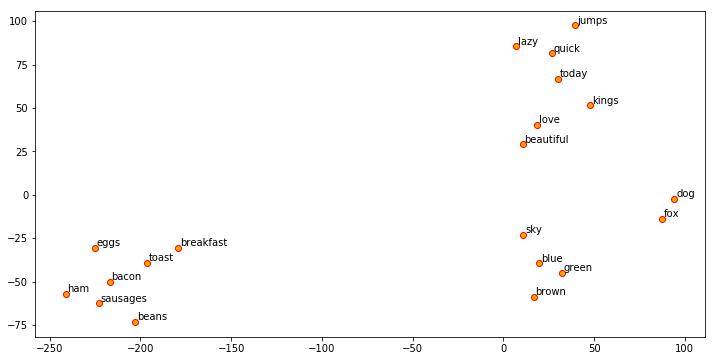

In [42]:
#Visualization
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [43]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(vec_df.values)
similarity_df = pd.DataFrame(similarity_matrix, index=unique_words, columns=unique_words)
similarity_df

,breakfast,ham,brown,jumps,bacon,dog,fox,today,eggs,beautiful,blue,quick,lazy,kings,sky,love,beans,toast,green,sausages
breakfast,1.000000,0.371688,0.277158,0.103865,0.487737,0.295957,0.165064,0.288788,0.431108,0.314472,0.197103,0.358221,0.319941,0.161841,0.205429,0.245735,0.378215,0.513436,0.288437,0.484660
ham,0.371688,1.000000,0.335111,0.046432,0.738816,0.262579,0.209454,0.104115,0.489116,0.110936,0.185452,0.191665,0.222571,0.127651,0.174496,0.218128,0.495773,0.500586,0.290761,0.710515
brown,0.277158,0.335111,1.000000,0.110400,0.432891,0.341204,0.406912,0.147419,0.466903,0.355700,0.683011,0.217009,0.256875,0.193487,0.408844,0.331943,0.453427,0.347578,0.646850,0.404895
jumps,0.103865,0.046432,0.110400,1.000000,0.091021,0.307960,0.250834,0.142099,0.150622,0.142554,0.187263,0.301096,0.222112,0.086659,0.278595,0.185114,0.095544,0.119099,0.150752,0.100810
bacon,0.487737,0.738816,0.432891,0.091021,1.000000,0.295123,0.210082,0.158949,0.620539,0.151157,0.242987,0.265370,0.264376,0.146716,0.172964,0.292268,0.617909,0.622701,0.386664,0.823075
dog,0.295957,0.262579,0.341204,0.307960,0.295123,1.000000,0.485855,0.223730,0.291202,0.280658,0.314065,0.299892,0.301678,0.156674,0.219087,0.358715,0.230778,0.182994,0.272693,0.326413
fox,0.165064,0.209454,0.406912,0.250834,0.210082,0.485855,1.000000,0.150072,0.247314,0.210050,0.371178,0.192686,0.267240,0.226735,0.303459,0.255050,0.118537,0.163371,0.323800,0.214655
today,0.288788,0.104115,0.147419,0.142099,0.158949,0.223730,0.150072,1.000000,0.183048,0.314184,0.180088,0.370023,0.286803,0.204743,0.256770,0.371651,0.147652,0.174257,0.246754,0.133225
eggs,0.431108,0.489116,0.466903,0.150622,0.620539,0.291202,0.247314,0.183048,1.000000,0.214437,0.297546,0.245487,0.236769,0.118819,0.223585,0.254177,0.585053,0.495935,0.392072,0.565044
beautiful,0.314472,0.110936,0.355700,0.142554,0.151157,0.280658,0.210050,0.314184,0.214437,1.000000,0.461366,0.289178,0.294308,0.158615,0.428081,0.594738,0.165268,0.189482,0.392392,0.135784


In [44]:
feature_names = np.array(unique_words)
similarity_df.apply(lambda row: feature_names[np.argsort(-row.values)[1:4]], 
                    axis=1)

breakfast        [toast, bacon, sausages]
ham              [bacon, sausages, toast]
brown                 [blue, green, eggs]
jumps                   [dog, quick, sky]
bacon              [sausages, ham, toast]
dog                    [fox, love, brown]
fox                    [dog, brown, blue]
today            [love, quick, beautiful]
eggs             [bacon, beans, sausages]
beautiful               [love, blue, sky]
blue                  [green, brown, sky]
quick            [lazy, today, breakfast]
lazy             [quick, love, breakfast]
kings                    [love, sky, fox]
sky              [blue, green, beautiful]
love             [beautiful, today, blue]
beans             [bacon, sausages, eggs]
toast        [bacon, sausages, breakfast]
green                  [blue, brown, sky]
sausages              [bacon, ham, beans]
dtype: object

# The FastText Model

The FastText model was first introduced by Facebook in 2016 as an extension and supposedly improvement of the vanilla Word2Vec model. Based on the original paper titled _[‘Enriching Word Vectors with Subword Information’](https://arxiv.org/pdf/1607.04606.pdf)_ by Mikolov et al. which is an excellent read to gain an in-depth understanding of how this model works. Overall, FastText is a framework for learning word representations and also performing robust, fast and accurate text classification. The framework is open-sourced by Facebook on [GitHub](https://github.com/facebookresearch/fastText) and claims to have the following.

- Recent state-of-the-art English word vectors.
- Word vectors for 157 languages trained on Wikipedia and Crawl.
- Models for language identification and various supervised tasks.

Though I haven't implemented this model from scratch, based on the research paper, following is what I learnt about how the model works. In general, predictive models like the Word2Vec model typically considers each word as a distinct entity (e.g. where) and generates a dense embedding for the word. However this poses to be a serious limitation with languages having massive vocabularies and many rare words which may not occur a lot in different corpora. 

The Word2Vec model typically ignores the morphological structure of each word and considers a word as a single entity. The FastText model ___considers each word as a Bag of Character n-grams___. This is also called as a ___subword model___ in the paper.

We add special boundary symbols __<__ and __>__ at the beginning and end of words. This enables us to distinguish prefixes and suffixes from other character sequences. We also include the word __w__ itself in the set of its n-grams, to learn a representation for each word (in addition to its character n-grams). 

Taking the word where and __n=3 (tri-grams)__ as an example, it will be represented by the __character n-grams__: __<wh, whe, her, ere, re>__ and the special sequence __< where >__ representing the whole word. Note that the sequence , corresponding to the word __< her >__ is different from the tri-gram __her__ from the word __where__.

In practice, the paper recommends in extracting all the n-grams for __n ≥ 3__ and __n ≤ 6__. This is a very simple approach, and different sets of n-grams could be considered, for example taking all prefixes and suffixes. We typically associate a vector representation (embedding) to each n-gram for a word. 

Thus, we can represent a word by the sum of the vector representations of its n-grams or the average of the embedding of these n-grams. Thus, due to this effect of leveraging n-grams from individual words based on their characters, there is a higher chance for rare words to get a good representation since their character based n-grams should occur across other words of the corpus.

## Robust FastText Model with Gensim

The __`gensim`__ package has nice wrappers providing us interfaces to leverage the FastText model available under the `gensim.models.fasttext` module. Let’s apply this once again on our toy corpus.

In [47]:
from gensim.models.fasttext import FastText
# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model
ft_model = FastText(tokenized_corpus, vector_size=feature_size,
                    window=window_context, min_count = min_word_count,
                    sg=sg, sample=sample)
ft_model

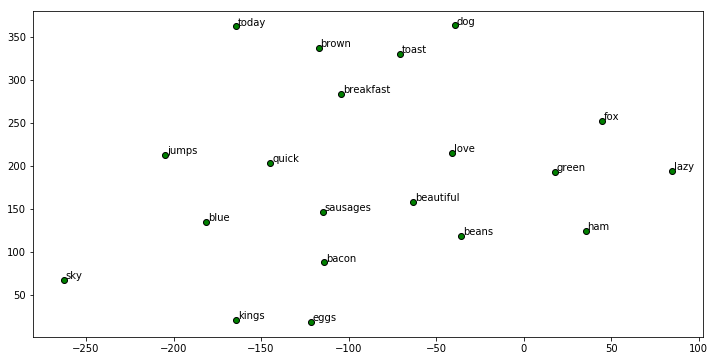

In [49]:
# visualize embeddings
from sklearn.manifold import TSNE
words = ft_model.wv.index_to_key
wvs = ft_model.wv[words]
tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [50]:
ft_model.wv['sky'], ft_model.wv['sky'].shape

(array([ 0.03422243,  0.00018397,  0.03499144,  0.00641293,  0.00053461,
        -0.01583497,  0.00076357,  0.00155133,  0.0125187 ,  0.01238049,
         0.00201522, -0.01994244, -0.00766502, -0.01429619,  0.00945461],
       dtype=float32),
 (15,))

In [52]:
print(ft_model.wv.similarity(w1='ham', w2='sky'))
print(ft_model.wv.similarity(w1='ham', w2='sausages'))

0.38487002
-0.5629549


In [53]:
st1 = "dog fox ham"
print('Odd one out for [',st1, ']:',  
      ft_model.wv.doesnt_match(st1.split()))

st2 = "bacon ham sky sausages"
print('Odd one out for [',st2, ']:', 
      ft_model.wv.doesnt_match(st2.split()))

Odd one out for [ dog fox ham ]: dog
Odd one out for [ bacon ham sky sausages ]: sausages


### Getting document level embeddings

Now suppose we wanted to cluster the eight documents from our toy corpus, we would need to get the document level embeddings from each of the words present in each document. One strategy would be to average out the word embeddings for each word in a document. This is an extremely useful strategy and you can adopt the same for your own problems. Let’s apply this now on our corpus to get features for each document.

In [56]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [57]:
# get document level embeddings
ft_doc_features = averaged_word_vectorizer(corpus=tokenized_corpus, model=ft_model,
                                             num_features=feature_size)
pd.DataFrame(ft_doc_features)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.011237,0.008387,0.012675,-0.006726,-0.001958,-0.005188,0.001376,0.009086,0.003689,0.004802,-0.005164,-0.003752,-0.003903,-0.003718,0.006580
1,0.009351,0.007547,0.013313,-0.006814,-0.004011,-0.003322,0.003594,0.005656,-0.001431,0.001047,-0.005472,-0.004592,-0.000458,-0.000603,0.001393
2,-0.005571,-0.006338,0.013106,0.000701,0.003298,0.010476,0.001043,0.004287,0.002590,-0.005235,0.004228,0.002889,-0.001942,-0.009729,-0.002363
3,-0.002918,-0.003347,-0.001071,0.004789,-0.000340,-0.001366,0.001614,0.006500,-0.005035,0.005247,-0.003243,-0.004417,-0.003004,-0.001925,0.002492
4,0.003721,-0.004872,0.003591,0.001483,-0.001659,-0.001081,0.001331,-0.000878,-0.004334,0.000539,-0.007235,-0.000270,-0.002797,-0.000193,0.002324
5,-0.009789,-0.003085,0.012669,-0.000324,0.004242,0.008789,0.001942,0.006073,0.001927,-0.005044,0.001100,0.003205,-0.002334,-0.005897,0.001574
6,0.012094,0.003856,0.008899,0.003155,-0.002511,-0.005437,0.000745,0.006590,0.007274,0.005609,-0.000089,-0.007771,-0.000483,-0.005375,0.004581
7,-0.011045,-0.007309,0.014845,0.005028,0.005641,0.011566,0.000568,0.002564,0.001439,-0.004279,0.003059,0.004672,-0.003071,-0.008501,0.000447
